In [6]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data=pd.read_csv('cardekho_data.csv')
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


<Axes: xlabel='Selling_Price', ylabel='Count'>

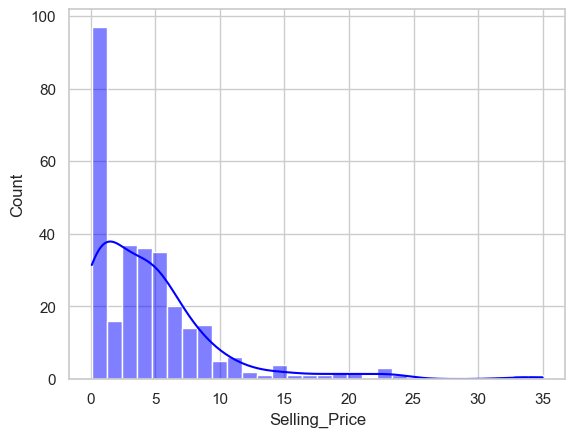

In [13]:

sns.set(style="whitegrid")
sns.histplot(data['Selling_Price'], bins=30, kde=True, color='blue')


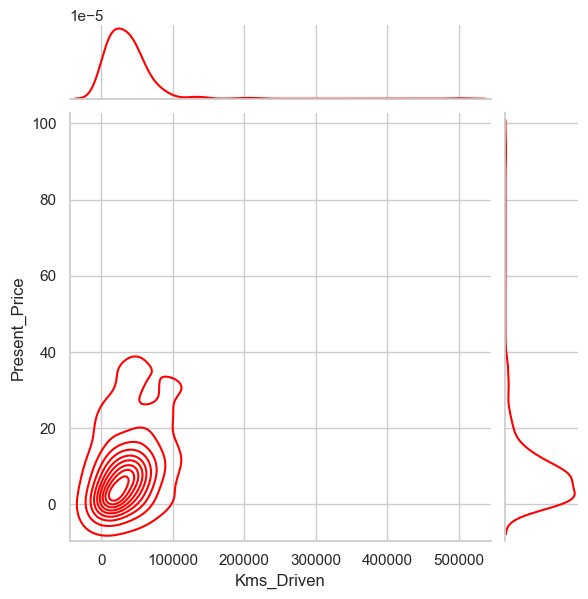

In [9]:
sns.jointplot(x=data['Kms_Driven'],y=data['Present_Price'], color='red', kind='kde')


<Axes: xlabel='Kms_Driven', ylabel='Present_Price'>

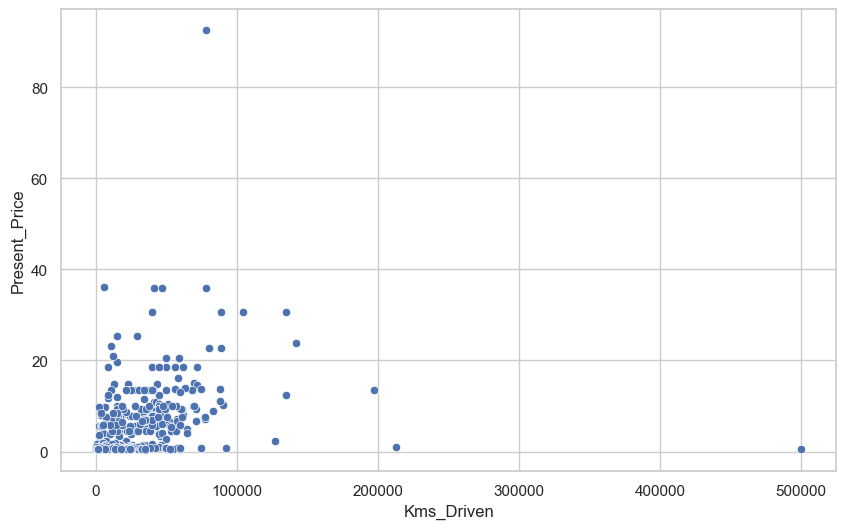

In [10]:
plt.figure(figsize=(10, 6))

# Create a scatter plot
sns.scatterplot(x=data['Kms_Driven'], y=data['Present_Price'])

<Axes: xlabel='Present_Price', ylabel='Kms_Driven'>

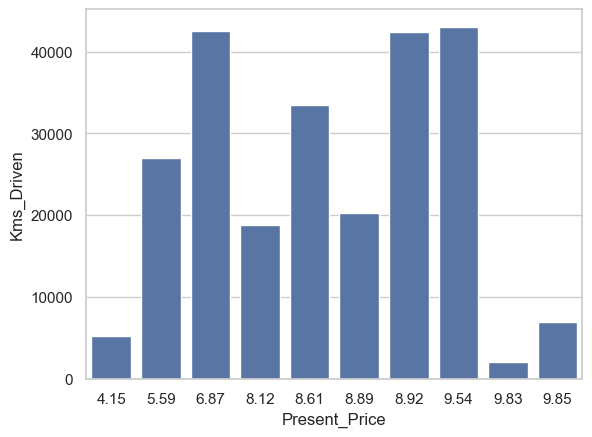

In [18]:
subset_data=data.head(10)
sns.barplot(x=subset_data['Present_Price'], y=subset_data['Kms_Driven'])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
X = data.drop(['Selling_Price'],axis=1)
y=data['Selling_Price']

In [ ]:
X = pd.get_dummies(X, drop_first=True)
X

,Year,Present_Price,Kms_Driven,Owner,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,Car_Name_Bajaj Avenger 220,...,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,5.59,27000,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1,2013,9.54,43000,0,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
2,2017,9.85,6900,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,2011,4.15,5200,0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
4,2014,6.87,42450,0,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,0,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
297,2015,5.90,60000,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
298,2009,11.00,87934,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
299,2017,12.50,9000,0,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


In [ ]:
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.5871639344262295
Mean Squared Error: 0.7622949068852457
R-squared: 0.9669079416580986


Test Mean Absolute Error: 0.5871639344262295
Test Mean Squared Error: 0.7622949068852457
Test R-squared: 0.9669079416580986


In [ ]:
predictions = rf_model.predict(X_test)
predictions


array([ 0.4289, 10.2911,  4.953 ,  0.2066,  7.5213,  6.5595,  1.124 ,
        0.588 ,  0.4606,  6.787 ,  7.9837,  1.104 ,  8.1953,  0.4576,
        5.35  ,  2.613 ,  1.115 , 14.3729,  0.4661,  1.5545,  0.3174,
        7.7989,  4.7705,  2.7115,  0.5104,  3.451 ,  5.256 ,  3.2135,
        1.1826,  1.1713,  0.3958,  8.9435,  0.4672,  2.555 ,  8.044 ,
        4.01  ,  6.4743,  5.9571,  2.5945,  6.4727,  4.6626,  3.6867,
        4.744 ,  0.5577,  6.16  ,  0.7144,  8.204 ,  6.7485,  2.9765,
        3.5025,  4.986 ,  1.511 , 22.9717, 20.8486,  6.46  , 10.2833,
        5.145 ,  8.8027,  2.9115,  6.6114,  0.2228])